In [11]:
from workshop_utils import *
%matplotlib inline

In [3]:
df = load_dataframe_from_s3('https://us-east-2.console.aws.amazon.com/athena/query/results/412cb09c-eb4d-4986-beca-2641e05ce8a6/csv')

Query results saved to: 
data/412cb09c-eb4d-4986-beca-2641e05ce8a6.csv

In [39]:
df = pd.read_csv('data/412cb09c-eb4d-4986-beca-2641e05ce8a6.csv')

In [40]:
df.set_index('user', inplace=True)
df.first_edit = df.first_edit.apply(pd.Timestamp)
df.last_edit = df.last_edit.apply(pd.Timestamp)

In [41]:
# Easier date objects?
df['first_day'] = df.first_edit.apply(lambda x: x.date())
df.head(2)

,first_edit,last_edit,total_edits,first_day
user,,,,
Wildwater,2018-05-28 11:21:28,2019-08-18 16:28:35,355588,2018-05-28
maher_elgammal,2019-05-14 13:41:14,2019-08-08 16:05:45,117166,2019-05-14


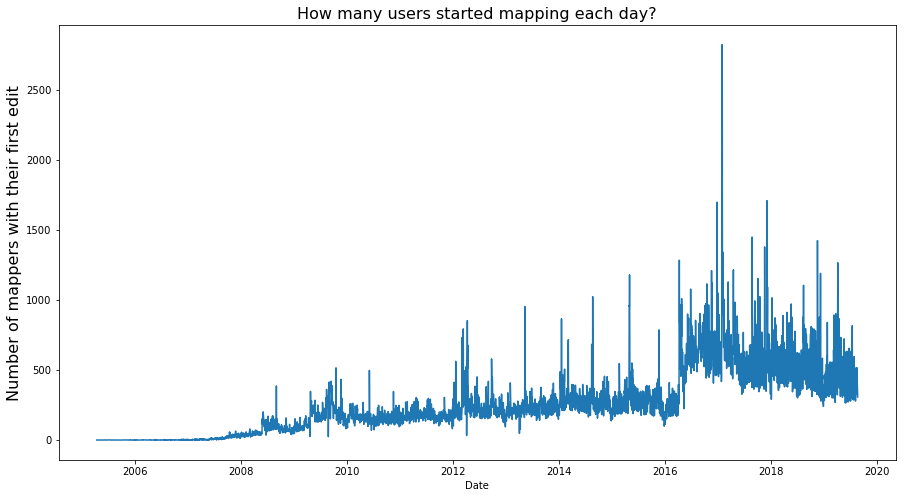

In [42]:
ax = df.groupby('first_day').aggregate('count')['first_edit'].plot(figsize=(15,8))
ax.set_xlabel("Date"); 
ax.set_ylabel("Number of mappers with their first edit", fontsize=16)
ax.set_title("How many users started mapping each day?", fontsize=16)
ax.get_figure().savefig('new_mappers_per_day_smooth.png', dpi=300)

Text(0.5,1,'How many users started mapping each day?')

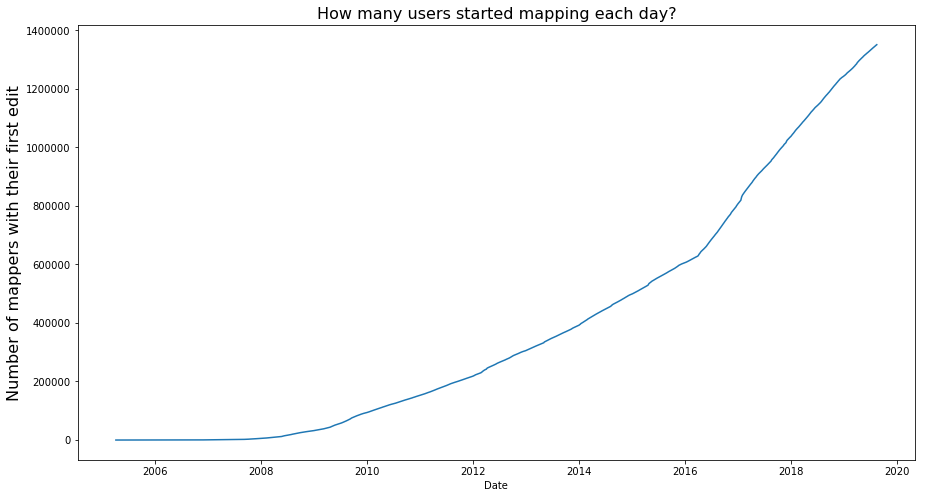

In [43]:
ax = df.groupby('first_day').aggregate('count')['first_edit'].cumsum().plot(figsize=(15,8))
ax.set_xlabel("Date"); 
ax.set_ylabel("Number of mappers with their first edit", fontsize=16)
ax.set_title("How many users started mapping each day?", fontsize=16)

In [44]:
df.groupby('first_day').aggregate('count').sort_values(by='first_edit',ascending=False)

,first_edit,last_edit,total_edits
first_day,,,
2017-01-26,2822,2822,2822
2017-01-27,2528,2528,2528
2017-01-25,2176,2176,2176
2017-01-24,2146,2146,2146
2017-12-01,1709,1709,1709
2016-12-23,1698,1698,1698
2017-08-21,1449,1449,1449
2018-11-14,1424,1424,1424
2017-11-15,1379,1379,1379


In [45]:
df['lifespan'] = df.last_edit - df.first_edit

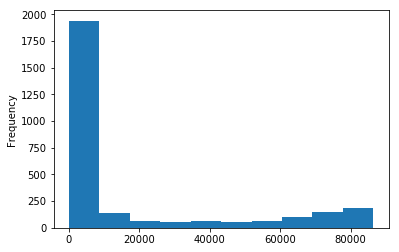

In [52]:
df[df.first_day==pd.Timestamp('2017-01-26').date()]['lifespan'].apply(lambda x: x.seconds).plot(kind='hist')